In [0]:
## ML Algo with TensorFlow

In [0]:
import numpy as np  
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
no_of_observations = 1000

x1 = np.random.uniform(-10,10,size = (no_of_observations,1)) #the size of this vector x1 should be (no of obs x 1)
x2 = np.random.uniform(-10,10,size = (no_of_observations,1))
inputs = np.column_stack((x1,x2))

noise = np.random.uniform(-1, 1, (no_of_observations,1))
targets = 2*x1 - 3*x2 + 5 + noise

np.savez('training.npz', inputs = inputs, targets = targets)

In [0]:
# Solving now with TensorFlow
input_size = 2 # since there are 2 independetn vars x1 and x2
output_size = 1

In [0]:
# inputs that need to go into tensor flow will go into placeholders. weights and biases go into variables

inputs_placeholder = tf.placeholder(tf.float32, [None,input_size]) # params are datatype and dimensions (None x input size). None here means that nothing specified so the no of rows can by anything
targets_placeholder = tf.placeholder(tf.float32, [None,output_size])

weights = tf.Variable(tf.random_uniform([input_size,output_size], minval = -0.1, maxval=0.1))
biases = tf.Variable(tf.random_uniform([output_size], minval = -0.1, maxval=0.1))

#now write the model equation y = wx + b
outputs = tf.matmul(inputs_placeholder,weights) +biases

In [0]:
#now we need an objective function
#loss here would be l2 norm so, loss = (sum of (xi -ti)^2)/no of obs / 2, which in other words is pretty much the error in our outcome from targets per observation
#inside tf, there is a module losses which contains maths/funcionality of the most common loss functions
mean_loss = tf.losses.mean_squared_error(labels = targets_placeholder, predictions = outputs) /2 #2. so that answers are float and not int

In [0]:
#now we need an optimization algo
#inside tf, there is a module losses train contains maths/funcionality of the most common optimization algos
learning_rate = 0.05
optimize = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(mean_loss) #we use gradient descent. We specified learning rate to 0.05 and we want to minimize the mean loss

In [81]:
#nothing has been executed yet but we have created everything required to learn
#in tf, the execution takes place in sessions. When we say tf.InteractiveSession. this is the tf classs we use wehnever we want to execute anything in tf world
#training in tf happens in these sessions and wehenever we use interactive session we mean to execute the process 
#storing this in a variable so i dont have to type the whole thing again everytime

session = tf.InteractiveSession()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:
#time to initialize variables
#weights and biases need to have some init values

initializer = tf.global_variables_initializer() #this method initializes all tensor objects marked as 'variables'
session.run(initializer) #execution of each step, we need to use this run method

In [83]:
training_data = np.load('training.npz')

(1000, 1)

In [0]:
#now we needa  for loop for learning

for epoch in range(100):
  _, curr_loss = session.run([optimize,mean_loss],feed_dict={inputs_placeholder:training_data['inputs'], targets_placeholder :training_data['targets']}) 
  #feed dict tells the algo how the data will be fed
  # np.savez('training.npz', inputs = inputs, targets = targets) this is wehre we got the labels of the data
  #the above call means that run the optimize and mean loss operations by feeding data specified in the placeholders
  
  print(curr_loss)

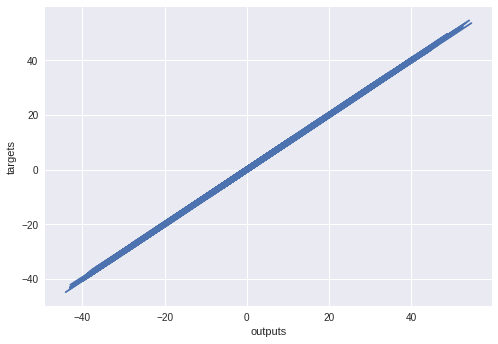

In [95]:
# Trainign is over as our cut off was 100 as in loop. now we have trained weights and biases adn hence now we just need the ouputs that we will run below
# Same notation as above but this time we don't want to train anymore, and we are not interested
# in the loss function value.
out = session.run([outputs], 
               feed_dict={inputs_placeholder: training_data['inputs']})
# The model is optimized, so the outputs are calculated based on the last form of the model

# We have to np.squeeze the arrays in order to fit them to what the plot function expects.
# Doesn't change anything as we cut dimensions of size 1 - just a technicality.
plt.plot(np.squeeze(out), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

In [0]:
#Some takeaways if we had used huber_loss as compared to mean squared loss:

#Any function that has the property to be lower for better results and higher for worse results can be a loss function. This includes the Huber loss.
#Almost everything seems identical.
#The values of the loss are generally lower (because of the Huber loss formula, and the convexity of the two functions).
#For our problem, both the L2-norm loss and the Huber loss work equally well.
#Generally, the Huber loss is used when we have a lot of outliers.